In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
import time

sample = datasets.load_breast_cancer()
X = sample.data
Y = sample.target
m = len(Y)
X_0 = np.ones((m, 1))
X = np.hstack([X_0, X])  # now shape = (569 × 31)
theta = np.zeros(X.shape[1])

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.reshape(-1,1), dtype=torch.float32)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor  = torch.tensor(Y_test.reshape(-1,1), dtype=torch.float32)

In [2]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

In [3]:
model = NN()
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 300
train_losses = []
val_losses = []

start = time.time()
for epoch in range(1, num_epochs+1):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, Y_train_tensor)
    train_losses.append(loss.item())

    with torch.no_grad():
        y_val_pred = model(X_test_tensor)
        val_loss = loss_fn(y_val_pred, Y_test_tensor)
        val_losses.append(val_loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss = {loss.item():.4f}")
end = time.time()

print("Training Time =", end - start, "seconds")
print("Final Training Loss =", train_losses[-1])

Epoch 50, Loss = 0.3624
Epoch 100, Loss = 0.0841
Epoch 150, Loss = 0.0499
Epoch 200, Loss = 0.0339
Epoch 250, Loss = 0.0232
Epoch 300, Loss = 0.0131
Training Time = 1.2786962985992432 seconds
Final Training Loss = 0.013138335198163986


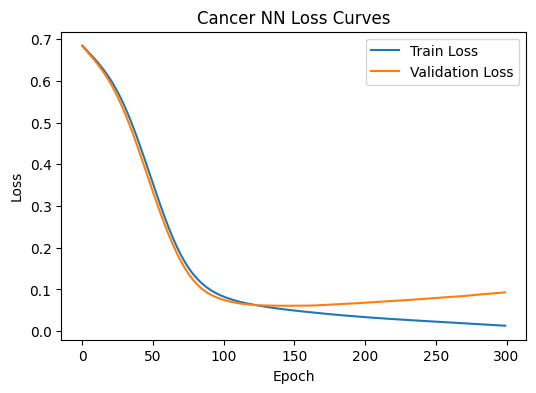


NN Evaluation
Accuracy : 0.9824561403508771
Precision: 0.9859154929577465
Recall   : 0.9859154929577465
F1 Score : 0.9859154929577465

Logistic Regression
Accuracy : 0.9736842105263158
Precision: 0.9722222222222222
Recall   : 0.9859154929577465
F1 Score : 0.9790209790209791

SVM
Accuracy : 0.9824561403508771
Precision: 0.9726027397260274
Recall   : 1.0
F1 Score : 0.9861111111111112


In [4]:
plt.figure(figsize=(6,4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Cancer NN Loss Curves")
plt.legend()
plt.show()

with torch.no_grad():
    y_pred_class = (model(X_test_tensor) >= 0.5).float().numpy()

# NN Evaluation
acc_nn  = accuracy_score(Y_test, y_pred_class)
prec_nn = precision_score(Y_test, y_pred_class)
rec_nn  = recall_score(Y_test, y_pred_class)
f1_nn   = f1_score(Y_test, y_pred_class)

print("\nNN Evaluation")
print("Accuracy :", acc_nn)
print("Precision:", prec_nn)
print("Recall   :", rec_nn)
print("F1 Score :", f1_nn)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=500)
log.fit(X_train, Y_train)
log_pred = log.predict(X_test)

print("\nLogistic Regression")
print("Accuracy :", accuracy_score(Y_test, log_pred))
print("Precision:", precision_score(Y_test, log_pred))
print("Recall   :", recall_score(Y_test, log_pred))
print("F1 Score :", f1_score(Y_test, log_pred))

# SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

print("\nSVM")
print("Accuracy :", accuracy_score(Y_test, svm_pred))
print("Precision:", precision_score(Y_test, svm_pred))
print("Recall   :", recall_score(Y_test, svm_pred))
print("F1 Score :", f1_score(Y_test, svm_pred))